<a href="https://colab.research.google.com/github/ArisNurAmrozi/PCVK_Genap_2021/blob/master/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import cv2
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

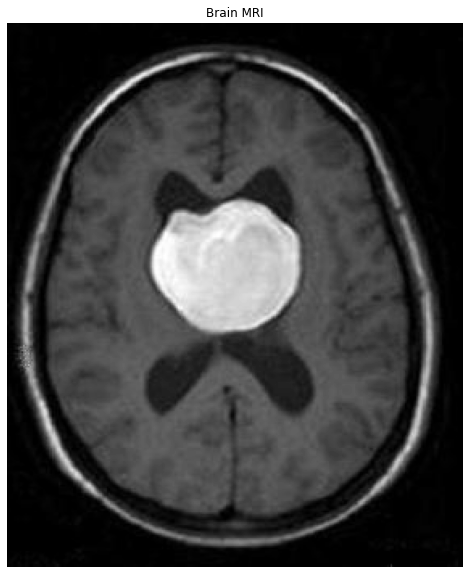

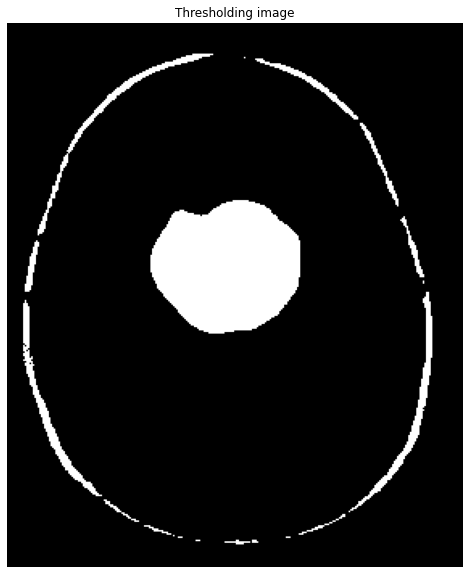

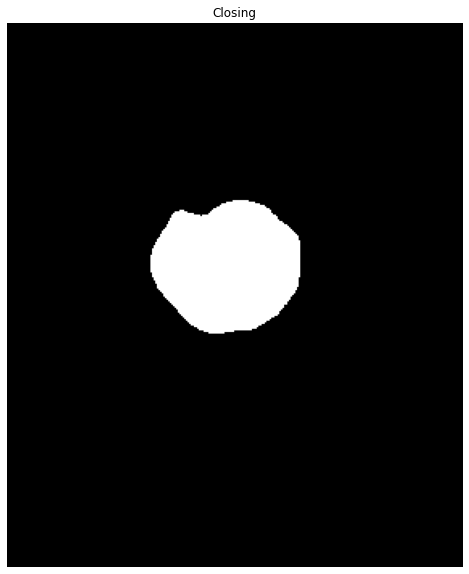

[[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[3 3 3]
  [6 6 6]
  [7 7 7]
  ...
  [2 2 2]
  [1 1 1]
  [0 0 0]]

 [[0 0 0]
  [2 2 2]
  [4 4 4]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [2 2 2]
  [4 4 4]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [7]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

img           = cv2.imread('/content/drive/MyDrive/PCVK_A/otak.jpg')
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI',gray,'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

img         = cv2.imread('/content/drive/MyDrive/PCVK_A/otak.jpg')
gray        = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(img.copy())

#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[closing==False] = (0,0,0)

In [9]:
#Tambahan Kode
import cv2 as cv
image = cv.imread('/content/drive/MyDrive/PCVK_A/Y8.jpg')
print(image)

[[[255 255 255]
  [253 253 253]
  [254 254 254]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [204 204 204]
  [215 215 215]
  ...
  [  9   9   9]
  [  8   8   8]
  [  8   8   8]]

 [[255 255 255]
  [203 203 203]
  [215 215 215]
  ...
  [  9   9   9]
  [  8   8   8]
  [  8   8   8]]

 ...

 [[254 254 254]
  [203 203 203]
  [217 217 217]
  ...
  [  7   7   7]
  [  8   8   8]
  [  8   8   8]]

 [[255 255 255]
  [203 203 203]
  [215 215 215]
  ...
  [  7   7   7]
  [  9   9   9]
  [  9   9   9]]

 [[255 255 255]
  [199 199 199]
  [209 209 209]
  ...
  [ 11  11  11]
  [ 12  12  12]
  [ 12  12  12]]]


In [14]:
#Ambil citra

from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.cm as cm

